# C3M3 Lesson 3 Practice Lab: Flight delays and cancellations - Histograms and rugplots

After analyzing the Australian flight delays and cancellations, it’s time to expand your insights with visualizations of delay distributions to refine your recommendations for the travel agency.

You will be working with a filtered version of the Domestic Airlines - On Time Performance dataset from the Australian Government data. This filtered version has only data for the 5 most popular routes. You will use the following columns in this lab:

- `Route`: Plane route Departure City - Arrival City
- `Sectors_Scheduled`: How many flights were scheduled for the given airline and route for the given month
- `Departures_Delayed`: Number of flights that departed the gate 15 minutes after the scheduled arrival time shown in the carriers' 

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 

</div>

## Table of contents
- [Step 1: Import libraries](#import-libraries)
- [Step 2: Load the data](#load-the-data)
- [Step 3: Understanding the distribution of cancellations](#understanding-the-distribution-of-cancellations)
    - [Histograms with rugplots](#histograms-with-rugplots)
    - [Subplots](#subplots)

<a id="import-libraries"></a>

## Step 1: Import libraries
This time you will need to import matplotlib and seaborn in addition to pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="load-the-data"></a>

## Step 2: Load the data
Run the cell below to load the data.

In [2]:
df = pd.read_csv("otp_top5_routes.csv")
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Brisbane-Melbourne,Brisbane,Melbourne,Qantas,2004-01-01,496.0,492,4.0,410.0,427.0,82.0,65.0,2004,1
1,Brisbane-Sydney,Brisbane,Sydney,Qantas,2004-01-01,683.0,677,6.0,576.0,595.0,101.0,82.0,2004,1
2,Melbourne-Sydney,Melbourne,Sydney,Qantas,2004-01-01,821.0,799,22.0,723.0,706.0,76.0,93.0,2004,1
3,Sydney-Brisbane,Sydney,Brisbane,Qantas,2004-01-01,686.0,682,4.0,614.0,599.0,68.0,83.0,2004,1
4,Sydney-Melbourne,Sydney,Melbourne,Qantas,2004-01-01,800.0,785,15.0,683.0,708.0,102.0,77.0,2004,1


<a id="understanding-the-distribution-of-cancellations"></a>

## Step 3: Understanding the distribution of delays
So far you were able to identify which routes suffered more cancellations, and which airlines where responsible for those cancellations as well as the distributions of cancellation rates. Now you can have a look at very similarly structured data about delays. You would like to know the distribution of delay rates. One drawback that histograms have is that you lose information about where the individual points lie. You can fix this by adding a rugplot on top of the histogram.

<a id="histograms-with-rugplots"></a>

### Histograms with rugplots
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>In the next cell, a column called "Delay_Rates" is created that contains the ratio of canceled flights to the total number of scheduled flights</li>
            <li>Plot the distribution of the delay rates.</li>
            <ul>
                <li> Plot a histogram (sns.histplot) with x axis set to "Delay_Rates"</li>
                <li> Plot a rugplot (sns.rugplot) with x axis set to "Delay_Rates"</li>
                <li> Change the x-axis label to "Delay Rates"</li>
                <li> Add the title "Delay rates distribution"</li>
            </ul>
        </ol>
</div>


Text(0.5, 1.0, 'Delay rates distribution')

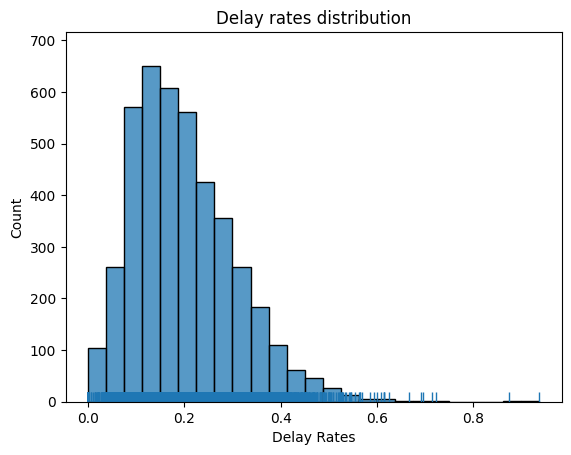

In [5]:
# find the proportion of cancelled flights (divide cancellations by the scheduled flights)
df["Delay_Rates"] = df["Departures_Delayed"] / df["Sectors_Scheduled"]

### START CODE HERE ###

# plot the histogram
sns.histplot(df, x="Delay_Rates", bins=25)
# add the rugplot
sns.rugplot(df, x="Delay_Rates")

# change xlabel
plt.xlabel("Delay Rates")
# add the title
plt.title("Delay rates distribution")

### END CODE HERE ###

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL3/hist_rug.png" width="350">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# plot the histogram
sns.histplot(df, x="Delay_Rates", bins=25)
# add the rugplot
sns.rugplot(df, x="Delay_Rates")

# change xlabel
plt.xlabel("Delay Rates")
# add the title
plt.title("Delay rates distribution")
```
</details>

Apart from displaying the distribution of data points, this visualization also highlights their individual locations. In this specific example, however, most of the points cluster between 0.2 and 0.4. Due to the large number of points, it becomes impossible to distinguish individual data points in that region. Nevertheless, the rugplot remains very effective for identifying outliers.

<a id="subplots"></a>

### Subplots
To gain a better understanding of the delays, it makes sense to split the data based on the route and examine whether certain routes experience more delays than others. This process involves creating multiple plots, and a valuable tool for plotting them all simultaneously is subplots. Run the cell below to discover how many different routes are present in the dataset.

In [6]:
routes = df["Route"].unique()

for route in routes:
    print(route)

Brisbane-Melbourne
Brisbane-Sydney
Melbourne-Sydney
Sydney-Brisbane
Sydney-Melbourne


With five routes to plot, it would make sense to create a 3x2 grid of subplots to display the delay rate distributions for all routes.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to create the subplots for the delay rate for each of the routes</li>
            <ul>
                <li> Set the figure size to 15x10 </li>
                <li> Loop over the routes (already implemented)</li>
                <li> Select one of the routes using  the index (already implemented)</li>
                <li> Filter the dataframe by the route (already implemented)</li>
                <li> Select the current subplot with the index</li>
                <li> Plot the histogram of <code>Delay_Rates</code> (already implemented)</li>
                <li> Plot the rugplot of <code>Delay_Rates</code> (already implemented)</li>
                <li> Set a title to know which subplot represents which route (already implemented) </li>
                <li> Set the x axis limits to show the same range on each subplot for easier comparison of the data (already implemented) </li>
            </ul>
        </ol>
</div>

In [ ]:
### START CODE HERE ###

plt.figure(figsize=(15, 10))

# Loop over all of the routes
for i in range(1, 6):
    # Select one of the routes (starting with 0)
    route = routes[i-1]
    # Filter the dataframe to keep only the data for that route
    df_filtered = df[df["Route"] == route]

    # Create a subplot (remember they start with 1)
    plt.subplot(2, 3, i)

    # Plot the histogram
    sns.histplot(df_filtered, x="Delay_Rates", binwidth=0.04)
    # Add the rugplot
    sns.rugplot(df_filtered, x="Delay_Rates")

    # Add a title
    plt.title(f"Delay Rates for {route} Route")
    
    # Set the x axis limits to show the same range on each subplot
    plt.xlim(-0.05, 1.05)

### END CODE HERE ###

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

Your plot should look something like this, though your title and y-axis text might be a bit different

<img src="imgsL3/subplots.png" width="400">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
plt.figure(figsize=(15, 10))

# Loop over all of the routes
for i in range(1, 6):
    # Select one of the routes (starting with 0)
    route = routes[i-1]
    # Filter the dataframe to keep only the data for that route
    df_filtered = df[df["Route"] == route]

    # Create a subplot (remember they start with 1)
    plt.subplot(2, 3, i)

    # Plot the histogram
    sns.histplot(df_filtered, x="Delay_Rates", binwidth=0.04)
    # Add the rugplot
    sns.rugplot(df_filtered, x="Delay_Rates")

    # Add a title
    plt.title(f"Delay Rates for {route} Route")
    
    # Set the x axis limits to show the same range on each subplot
    plt.xlim(-0.05, 1.05)
```
</details>

Congratulations for making it until the end of this module's labs. You have learned a lot about analyzing and plotting your data. Hope you enjoyed it! 